# CUSTOMER CHURN [CAPSTONE PROJECT]

In [ ]:
# Problem Statement:
# You are the Data Scientist at a telecom company “Neo” whose customers are churning out to
# its competitors. You have to analyse the data of your company and find insights and stop your
# customers from churning out to other telecom companies.

# Domain – Telecom

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# EDA (Exploratory Data Analysis)

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#  Checking NULL values are present or not
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## A) Data Manipulation:

In [7]:
# a. Extract the 5th column & store it in ‘customer_5’
customer_5 = df.iloc[:,4]
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


In [8]:
# b. Extract the 15th column & store it in ‘customer_15’
customer_15 = df.iloc[:,14]
print(customer_15)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


In [11]:
# c. Extract all the male senior citizens whose Payment Method is Electronic check &
# store the result in ‘senior_male_electronic’

senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']>=1) & (df['PaymentMethod']=='Electronic check')]
print(senior_male_electronic)


      customerID gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV   Male              1      No         No       1   
55    1658-BYGOY   Male              1      No         No      18   
57    5067-XJQFU   Male              1     Yes        Yes      66   
78    0191-ZHSKZ   Male              1      No         No      30   
91    2424-WVHPL   Male              1      No         No       1   
...          ...    ...            ...     ...        ...     ...   
6837  6229-LSCKB   Male              1      No         No       6   
6894  1400-MMYXY   Male              1     Yes         No       3   
6914  7142-HVGBG   Male              1     Yes         No      43   
6967  8739-WWKDU   Male              1      No         No      25   
7032  6894-LFHLY   Male              1      No         No       1   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service             DSL             No  ...   
55            Yes    

In [13]:
# d. Extract all those customers whose tenure is greater than 70 months or their
# Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

customer_total_tenure = df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
print(customer_total_tenure)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
8     7892-POOKP  Female              0     Yes         No      28   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   
7037  2569-WGERO  Female              0      No         No      72   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
8             Yes           Yes     Fiber optic                   No  ...   
12   

In [14]:
# e. Extract all the customers whose Contract is of two years, payment method is Mailed
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes = df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
print(two_mail_yes)
# Here, I have used the & operator to combine the three conditions and extract the relevant rows from the DataFrame df. 
# The resulting DataFrame two_mail_yes will contain only those rows where the Contract is of two years, payment method is
# Mailed check, and the value of Churn is ‘Yes’.


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year               No  M

In [15]:
# f. Extract 333 random records from the customer_churndataframe & store the result in
# ‘customer_333’

customer_333=df.sample(n=333)
print(customer_333)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1339  3838-OZURD    Male              0     Yes         No      66   
4697  0129-KPTWJ    Male              0     Yes         No      72   
2449  1357-MVDOZ    Male              0     Yes        Yes      11   
6336  8647-SDTWQ    Male              0     Yes        Yes      57   
4162  0769-MURVM  Female              0     Yes        Yes      72   
...          ...     ...            ...     ...        ...     ...   
147   2135-RXIHG    Male              0      No         No       1   
1975  4703-MQYKT    Male              0      No         No      21   
6117  3308-DGHKL    Male              0      No         No      69   
1324  0031-PVLZI  Female              0     Yes        Yes       4   
5879  6603-YRDCJ    Male              0     Yes         No      33   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
1339          Yes               Yes     Fiber optic                   No  ... 

In [16]:
# g. Get the count of different levels from the ‘Churn’ column
churn_count = df['Churn'].value_counts()
print(churn_count)

No     5174
Yes    1869
Name: Churn, dtype: int64


## B) Data Visualization:

In [ ]:
# a. Build a bar-plot for the ’InternetService’ column:
# i. Set x-axis label to ‘Categories of Internet Service’
# ii. Set y-axis label to ‘Count of Categories’
# iii. Set the title of plot to be ‘Distribution of Internet Service’
# iv. Set the color of the bars to be ‘orange’


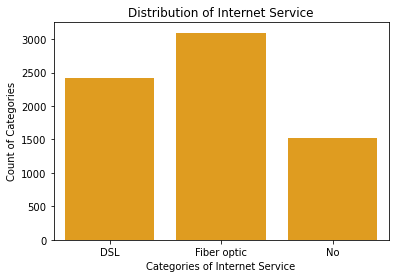

In [18]:
# create a bar plot
sns.countplot(x='InternetService', data=df, color='orange')

# set x-axis label
plt.xlabel('Categories of Internet Service')

# set y-axis label
plt.ylabel('Count of Categories')

# set plot title
plt.title('Distribution of Internet Service')

# show the plot
plt.show()


In [ ]:
# b. Build a histogram for the ‘tenure’ column:
# i. Set the number of bins to be 30
# ii. Set the color of the bins to be ‘green’
# iii. Assign the title ‘Distribution of tenure’

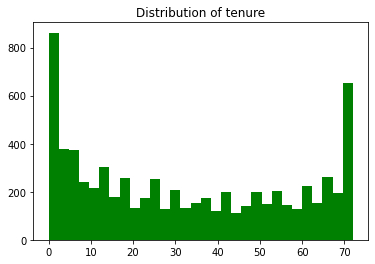

In [20]:
# set the number of bins to 30
num_bins = 30

# set the color of the bins to green
color = 'green'

# create the histogram
plt.hist(df['tenure'], bins=num_bins, color=color)

# set the title of the histogram
plt.title('Distribution of tenure')

# show the plot
plt.show()


In [ ]:
# c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
# the y-axis & ‘tenure’ to the ‘x-axis’:
# i. Assign the points a color of ‘brown’
# ii. Set the x-axis label to ‘Tenure of customer’
# iii. Set the y-axis label to ‘Monthly Charges of customer’
# iv. Set the title to ‘Tenure vs Monthly Charges’

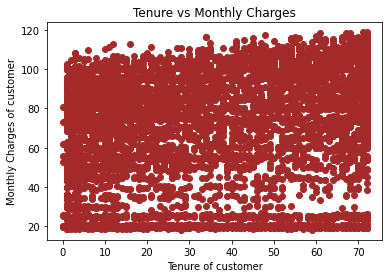

In [21]:

plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()


In [ ]:
# d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
# ‘Contract’ on the x-axis.

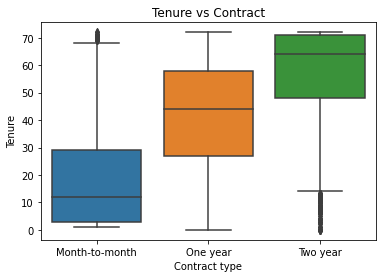

In [22]:
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Tenure vs Contract')
plt.xlabel('Contract type')
plt.ylabel('Tenure')
plt.show()

# Model Implementation

## C) Linear Regression:

In [ ]:
# a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and
# independent variable is ‘tenure’
# i. Divide the dataset into train and test sets in 70:30 ratio.
# ii. Build the model on train set and predict the values on test set
# iii. After predicting the values, find the root mean square error
# iv. Find out the error in prediction & store the result in ‘error’
# v. Find the root mean square error

In [23]:
#  Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
# X is a Independent Variable ==> tenure
# Y is a Dependent Variable ==> MonthlyCharges

# Let's define the Dependent & Independent Variables
X = df[['tenure']]
Y = df[['MonthlyCharges']]

In [30]:
# Divide the dataset into train and test sets in a 70:30 ratio:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [33]:
# Training the linear regression model on the training set:
LinearModel = LinearRegression()

LinearModel.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Predicting the values on the test set
LinearModel_Predict = LinearModel.predict(X_test)

LinearModel_Predict

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [43]:
# Finding the root mean square error

error = np.sqrt(mean_squared_error(Y_test, LinearModel_Predict))

In [45]:
# Printing the Error

print("Root Mean Squared Error: ", error)

Root Mean Squared Error:  29.394584027273893


## D) Logistic Regression:

In [ ]:
# a. Build a simple logistic regression model where dependent variable is ‘Churn’ &
# independent variable is ‘MonthlyCharges’
# i. Divide the dataset in 65:35 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score

In [66]:
#  Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
# X is an Independent Variable as "MonthlyCharges"
# Y is an Dependent Variable as "Churn"

# Define the variables
X = df[['MonthlyCharges']]
Y = df[['Churn']]

In [68]:
# Divide the dataset into train and test set in 65:35 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.35, random_state = 0)

In [70]:
# Training the Logistic regression model on the training set:
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, Y_train.values.ravel())

LogisticRegression()

In [74]:
# Predicting the values on the test set    
LRM_Predict = LogisticModel.predict(X_test)      # LRM stands for Logistic Regression Model

LRM_Predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [75]:
# Time to build CONFUSION MATRIX And get the ACCURACY SCORE
CM = confusion_matrix(Y_test, LRM_Predict)
Accuracy = accuracy_score(Y_test, LRM_Predict)


In [77]:
# Print CONFUSION MATRIX & ACCURACY SCORE

print("Confusion Matrix: ")
print(CM)
print("Accuracy Score: ")
print(Accuracy)

Confusion Matrix: 
[[1815    0]
 [ 651    0]]
Accuracy Score: 
0.7360097323600974


In [78]:
# b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
# independent variables are ‘tenure’ & ‘MonthlyCharges’
# i. Divide the dataset in 80:20 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score

In [79]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the independent and dependent variables
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

# Divide the dataset into training and testing sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model on training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the values on test data
y_pred = logreg.predict(X_test)

# Build the confusion matrix and get the accuracy score
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', conf_mat)
print('Accuracy Score:', accuracy)


Confusion Matrix:
 [[944  92]
 [193 180]]
Accuracy Score: 0.7977288857345636


## E) Decision Tree:

In [ ]:
# a. Build a decision tree model where dependent variable is ‘Churn’ & independent
# variable is ‘tenure’
# i. Divide the dataset in 80:20 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy

In [83]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the dependent and independent variables
X = df[['tenure']]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree model
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Predict the values for the testing data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy:  0.7572746628814763
Confusion Matrix:
 [[951  85]
 [257 116]]


## F) Random Forest:

In [84]:
# a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
# variables are ‘tenure’ and ‘MonthlyCharges’
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy

In [85]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Selecting independent variables
X = df[['tenure', 'MonthlyCharges']]

# Selecting dependent variable
y = df['Churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training set
rfc.fit(X_train, y_train)

# Predicting the values for test set
y_pred = rfc.predict(X_test)

# Building the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Calculating the accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)


Confusion Matrix:
 [[1341  198]
 [ 308  266]]
Accuracy Score: 0.7605300520586843
